In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import expit
from itertools import *
from matplotlib import markers
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
from sepdesign import*
from matplotlib import cm
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.transforms import blended_transform_factory
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from collections import OrderedDict
sns.set_context('paper')
sns.set_style('white')
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

2
0
1


/Users/salarsk/packages/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


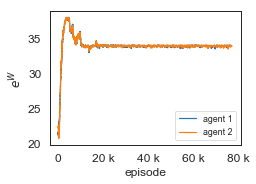

In [52]:
fig, ax = plt.subplots(figsize=(3.5,2.5),tight_layout={'pad':0.5})
with open('try.out', 'rb') as f:
    z = pickle.load(f)

agent1_b_mean = [[] for _ in range(len(z))]
agent1_b_up   = [[] for _ in range(len(z))]
agent1_b_down = [[] for _ in range(len(z))]
data = []
# print(len(z[0::2]))
print(len(z))
for k in range(len(z)):
    print(k)
    for i in z[k]:
        if len(i) > 0:
            agent1_b_mean[k].append(np.mean(i))
            agent1_b_up[k].append(np.percentile(i, 97.5))
            agent1_b_down[k].append(np.percentile(i, 2.5))

    df_m = pd.DataFrame(agent1_b_mean[k])
    df_up = pd.DataFrame(agent1_b_up[k])
    df_down = pd.DataFrame(agent1_b_down[k])
    roll_m = df_m.rolling(200).mean()
    roll_up = df_up.rolling(200).mean()
    roll_down = df_down.rolling(200).mean()
    ax.plot(roll_m, label = 'agent '+str(k+1))
ax.axes.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# ax.set_ylim([20 , 35])
ax.set_xlabel('episode', size=12)
ax.set_ylabel('$e^W$', size=12)
ax.legend()
fig.savefig('try4.png', dpi = 300)
plt.show()

/Users/salarsk/packages/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


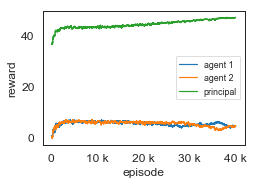

In [56]:
fig, ax = plt.subplots(figsize=(3.5,2.5),tight_layout={'pad':0.5})
for k in range(2):
        with open('agent_'+str(k+1)+'_reward.out', 'rb') as f:
            z = pickle.load(f)
        df_m = pd.DataFrame(z)
        plt.plot(df_m.rolling(200).mean(), label='agent '+str(k+1))
with open('principal_reward.out', 'rb') as f:
    z = pickle.load(f)
df_m = pd.DataFrame(z)
ax.plot(df_m.rolling(200).mean(), label = 'principal')
ax.axes.tick_params(labelsize=12)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_xlabel('episode', size=12)
ax.set_ylabel('reward', size=12)
ax.legend()
fig.savefig('reward1', dpi=300)
plt.show()